In [3]:
import numpy as np
import pandas as pd
import spacy
nlp = spacy.load('en_core_web_lg')

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.decomposition import PCA

In [4]:
def cosine_similarity(u,v):
    return np.dot(u,v)/(np.linalg.norm(u)*np.linalg.norm(v))

def get_vector(w):
    return nlp(w).vector


def neutralize(word, g, model):
    
    e = get_vector(word)
    e_biascomponent = np.dot(e, g)/(np.linalg.norm(g)**2) *g
    e_debiased = e - e_biascomponent
 
    return e_debiased

def equalize(pair, bias_axis, model):
    
    w1, w2 = pair
    e_w1, e_w2 = get_vector(w1), get_vector(w2)
    
    mu = (e_w1 + e_w2)/2

    mu_B = np.dot(mu, bias_axis)/np.linalg.norm(bias_axis)**2 * bias_axis
    mu_orth = mu - mu_B

    e_w1B = np.dot(e_w1, bias_axis)/np.linalg.norm(bias_axis)**2 * bias_axis
    e_w2B = np.dot(e_w2, bias_axis)/np.linalg.norm(bias_axis)**2 * bias_axis
        
    corrected_e_w1B = np.sqrt(np.abs(1 - np.linalg.norm(mu_orth)**2))*(e_w1B - mu_B)\
    /np.linalg.norm(e_w1 - mu_orth - mu_B)
    corrected_e_w2B = np.sqrt(np.abs(1 - np.linalg.norm(mu_orth)**2))*(e_w2B - mu_B)\
    /np.linalg.norm(e_w2 - mu_orth - mu_B)

    e1 = corrected_e_w1B + mu_orth
    e2 = corrected_e_w2B + mu_orth
    
    return e1, e2

In [34]:
# Reduce the 300-dimensional data to 2D for plotting purposes
def plot_2d(words, word_vectors): 
    
    pca = PCA(n_components = 2)
    pca.fit(word_vectors)
    
    word_vecs_2d = pca.transform(word_vectors)
    
    plt.figure(figsize=(10,10))

    plt.scatter(word_vecs_2d[:,0], word_vecs_2d[:,1],color='r',marker='o',alpha=.5)

    for word, coord in zip(words, word_vecs_2d):
        x, y = coord
        plt.text(x, y, word, size = 10)

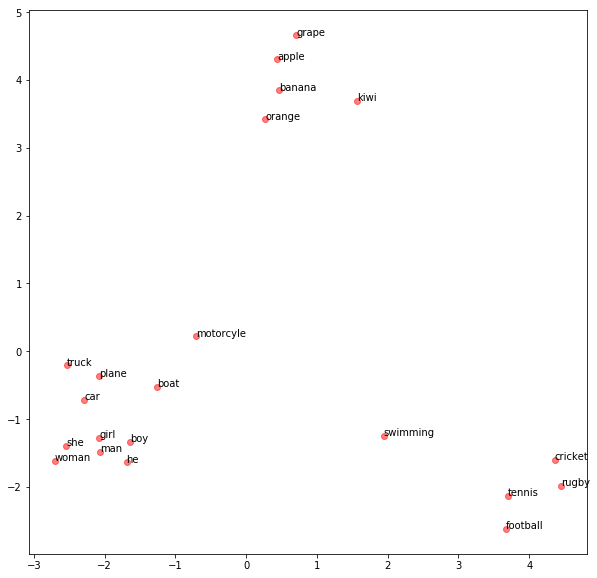

In [35]:
words = ['car','truck','plane','boat','motorcyle','apple','orange','banana','grape','kiwi',\
        'man','woman','he','she','girl','boy','football','cricket','rugby','tennis','swimming']
word_vectors = []
for w in words:
    word_vectors.append(get_vector(w))
    
plot_2d(words,word_vectors)

In [8]:
g = get_vector('woman') - get_vector('man') # gender (bias) axis

### Neutralizing non-gender specific words

In [10]:
# Before debiasing
words = ['doctor','architect','nurse','astronaut','astrophysicist','receptionist','soldier',\
        'professor','teacher','pianist']
print("Profession, Gender similarity")
for w in words:
    print (w, cosine_similarity(get_vector(w), g))

Profession, Gender similarity
doctor 0.16575728
architect -0.062278565
nurse 0.33493137
astronaut 0.07315138
astrophysicist -0.009591946
receptionist 0.2427326
soldier -0.04065294
professor 0.03045431
teacher 0.13410613
pianist 0.026752872


In [12]:
# After debiasing
for w in words:
    print(w, cosine_similarity(neutralize(w,g,nlp),g))

doctor -1.2160161e-08
architect -5.726421e-09
nurse 1.4314909e-08
astronaut -4.0307175e-09
astrophysicist 5.693421e-09
receptionist -2.2325555e-08
soldier -4.8717768e-09
professor 3.6760666e-09
teacher -6.6170225e-09
pianist 3.787074e-09


In [28]:
print("cosine similarities before equalizing:")
print("cosine_similarity('father', gender) = ", cosine_similarity(get_vector('father'), g))
print("cosine_similarity('mother', gender) = ", cosine_similarity(get_vector('mother'), g))
print()
e1, e2 = equalize(("father", "mother"), g, nlp)
print("cosine similarities after equalizing:")
print("cosine_similarity(e1, gender) = ", cosine_similarity(e1, g))
print("cosine_similarity(e2, gender) = ", cosine_similarity(e2, g))

cosine similarities before equalizing:
cosine_similarity('father', gender) =  -0.015650634
cosine_similarity('mother', gender) =  0.32043645

cosine similarities after equalizing:
cosine_similarity(e1, gender) =  -0.49341944
cosine_similarity(e2, gender) =  0.49341944


In [18]:
g2 = ((get_vector('woman')-get_vector('man')) + (get_vector('she') - get_vector('he')))/2

In [19]:
# Before debiasing
words = ['doctor','architect','nurse','astronaut','astrophysicist','receptionist','soldier',\
        'professor','teacher','pianist']
print("Profession, Gender similarity")
for w in words:
    print (w, cosine_similarity(get_vector(w), g2))

Profession, Gender similarity
doctor 0.15333293
architect -0.11637911
nurse 0.3635395
astronaut 0.05343285
astrophysicist -0.026598658
receptionist 0.25424922
soldier -0.07420897
professor 0.022193832
teacher 0.15484932
pianist 0.021142859


In [21]:
# After debiasing
for w in words:
    print(w, cosine_similarity(neutralize(w,g2,nlp),g2))

doctor -6.275508e-11
architect 1.2872662e-08
nurse -1.6679582e-08
astronaut -4.4630775e-09
astrophysicist 3.1731517e-09
receptionist -1.991344e-08
soldier 7.884939e-09
professor 5.165166e-09
teacher -3.3211e-09
pianist -8.029965e-09


In [25]:
g5 = ((get_vector('woman')-get_vector('man')) + (get_vector('she') - get_vector('he')) \
      + (get_vector('her') - get_vector('his')) + (get_vector('girl') - get_vector('boy')) + \
     (get_vector('female') - get_vector('male')))/5

In [26]:
# Before debiasing
words = ['doctor','architect','nurse','astronaut','astrophysicist','receptionist','soldier',\
        'professor','teacher','pianist']
print("Profession, Gender similarity")
for w in words:
    print (w, cosine_similarity(get_vector(w), g5))

Profession, Gender similarity
doctor 0.10746965
architect -0.13924581
nurse 0.35092363
astronaut 0.029756181
astrophysicist -0.012247718
receptionist 0.25623095
soldier -0.09917962
professor 0.012647088
teacher 0.16289642
pianist 0.013357573


In [27]:
# After debiasing
for w in words:
    print(w, cosine_similarity(neutralize(w,g5,nlp),g5))

doctor -4.9429e-09
architect -3.611294e-08
nurse 3.626432e-08
astronaut 3.784378e-09
astrophysicist 5.0127342e-09
receptionist -1.3493361e-08
soldier -6.34948e-09
professor -1.1375688e-08
teacher 1.8966095e-09
pianist 9.13777e-09


In [29]:
print("cosine similarities before equalizing:")
print("cosine_similarity('father', gender) = ", cosine_similarity(get_vector('father'), g5))
print("cosine_similarity('mother', gender) = ", cosine_similarity(get_vector('mother'), g5))
print()
e1, e2 = equalize(("father", "mother"), g5, nlp)
print("cosine similarities after equalizing:")
print("cosine_similarity(e1, gender) = ", cosine_similarity(e1, g5))
print("cosine_similarity(e2, gender) = ", cosine_similarity(e2, g5))

cosine similarities before equalizing:
cosine_similarity('father', gender) =  -0.09100127
cosine_similarity('mother', gender) =  0.30725563

cosine similarities after equalizing:
cosine_similarity(e1, gender) =  -0.5582713
cosine_similarity(e2, gender) =  0.5582712
